In [1]:
print("all ok")

all ok


In [10]:
import pandas as pd
import numpy as np

np.random.seed(23)

mu_vec1=np.array([0,0,0])
cov_mat1=np.array([[1,0,0],[0,1,0],[0,0,1]])
class_sample1=np.random.multivariate_normal(mu_vec1,cov_mat1,20)

df=pd.DataFrame(class_sample1,columns=['f1','f2','f3'])
df['target']=1

mu_vec2=np.array([1,1,1])
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
class_sample2=np.random.multivariate_normal(mu_vec2,cov_mat2,20)

df1=pd.DataFrame(class_sample2,columns=['f1','f2','f3'])
df1['target']=0

df=pd.concat([df,df1],axis=0,ignore_index=True)
df.head(5)

f1        f2        f3  target
0  0.666988  0.025813 -0.777619       1
1  0.948634  0.701672 -1.051082       1
2 -0.367548 -1.137460 -1.322148       1
3  1.772258 -0.347459  0.670140       1
4  0.322272  0.060343 -1.043450       1

In [11]:
df.shape

(40, 4)

In [16]:
import plotly.express as px

fig=px.scatter_3d(df,x=df['f1'],y=df['f2'],z=df['f3'],color=df['target'].astype('str'))

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,color='DarkSlateGrey')),
                              selector=dict(mode='markers'))



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'color=1<br>f1=%{x}<br>f2=%{y}<br>f3=%{z}<extra></extra>',
              'legendgroup': '1',
              'marker': {'color': '#636efa',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': 12,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '1',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': {'bdata': ('R4sbVvdX5T8W2W9RNVvuPzR/m4johd' ... 'ONVsg/XWrTBzc51b8gAM0WKsPvvw=='),
                    'dtype': 'f8'},
              'y': {'bdata': ('zF70i75umj+dLFFoGHTmP5Dqwu4IM/' ... 'ZtY+A/w/iaE0Ee+r8G31OX/6bEvw=='),
                    'dtype': 'f8'},
              'z': {'bdata': ('HZiMG0Li6L++jebmOtHwvxs+ICmEJ/' ... 'JA1sA/HpfeUMjP4z9pID6QFhTzPw=='),
                    'dtype': 'f8'}},
             {'hovertemplate': 'color=0<br>f1=%{x}<br>f2=%{y}<br>f3=%{z}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#EF553B',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': 12,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '0',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': {'bdata': ('boKqVAQD9D++dTctYWvnPzRdK0Zr1P' ... '4ecvC/dCFb4kF16L8EfKzkoKHYPw=='),
                    'dtype': 'f8'},
              'y': {'bdata': ('iFzPPGzbxz9Y7pls347gP7jbSrQAwB' ... 'tHGvI/exh6a2YQ+T/bzhwxPi31Pw=='),
                    'dtype': 'f8'},
              'z': {'bdata': ('IB8B2gpC+z8pJ+dW9vQBQEBWe0rkn7' ... 'ds0wRAIubuANbH+D+QoBMM42q6vw=='),
                    'dtype': 'f8'}}],
    'layout': {'legend': {'title': {'text': 'color'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'f1'}},
                         'yaxis': {'title': {'text': 'f2'}},
                         'zaxis': {'title': {'text': 'f3'}}},
               'template': '...'}
})

In [17]:
# step-1 apply standard scaler

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

df.iloc[:,0:3]=scaler.fit_transform(df.iloc[:,0:3])

In [18]:
## step-2 : find covariance matrix

covariance_matrix=np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
covariance_matrix

array([[1.02564103, 0.20478114, 0.080118  ],
       [0.20478114, 1.02564103, 0.19838882],
       [0.080118  , 0.19838882, 1.02564103]])

In [19]:
eigen_values,eigen_vectors=np.linalg.eig(covariance_matrix)

In [20]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [21]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [24]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D,proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self,xs,ys,zs,*args,**kwargs):
        FancyArrowPatch.__init__(self,(0,0),(0,0),*args,**kwargs)
        self._verts3d=xs,ys,zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['f1'], df['f2'], df['f3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['f1'].mean()], [df['f2'].mean()], [df['f3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['f1'].mean(), v[0]], [df['f2'].mean(), v[1]], [df['f3'].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


AttributeError: 'NoneType' object has no attribute 'M'

<Figure size 700x700 with 1 Axes>

In [25]:
pc=eigen_vectors[0:2]

In [26]:
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [27]:
transform_df=np.dot(df.iloc[:,0:3],pc.T)
new_df=pd.DataFrame(transform_df,columns=['PC1','PC2'])
new_df['target']=df['target'].values
new_df.head()

PC1       PC2  target
0 -0.429384  0.829265       1
1 -1.124520  0.842226       1
2  0.599433  1.795862       1
3 -0.094556 -0.761566       1
4 -0.401542  1.203061       1

In [ ]:
fig=px.scatter(new_df,x=new_df['PC1'],y=new_df['PC2'],color=df['target'].astype('str'))

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,color='DarkSlateGrey')),
                              selector=dict(mode='markers'))


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'color=1<br>PC1=%{x}<br>PC2=%{y}<extra></extra>',
              'legendgroup': '1',
              'marker': {'color': '#636efa',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': 12,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '1',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': ('ZXnnOwZ727+wo0gNCf7xv+CiRYyOLu' ... 'nlgMK/4jUNyime+z8cDtkub9/0Pw=='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('wDHL4FWJ6j/7NDyFhPPqP47rmOHZu/' ... 'JdrN8/GO4IsE6F3z8GsRfAWYHePw=='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'color=0<br>PC1=%{x}<br>PC2=%{y}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#EF553B',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': 12,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '0',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': ('MMYG5uK1zT/FuN7RAAffP/sVc7EU8Q' ... 'R57vA/Wvy2jIr0yT8mCLtbGunrvw=='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('3/AiH7Zz8r/9cPETu3vzv6MiCZPQS9' ... 'j+7dy/Sr34oiqBtz/vGZ2TSvvgPw=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'color'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'PC1'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'PC2'}}}
})

#### PCA on MNIST dataset

In [29]:
df=pd.read_csv(r'../Datasets/train_mnist.csv')
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [30]:
df.shape

(42000, 785)

In [31]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
36501      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
36501       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
36501         0         0         0         0         0  

[1 rows x 785 columns]

In [32]:
import matplotlib.pylab as plt

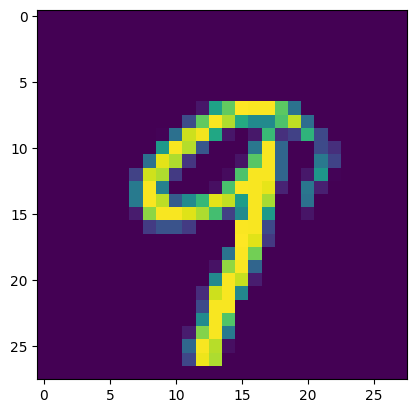

In [33]:
plt.imshow(df.iloc[36501,1:].values.reshape(28,28))

In [34]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
21947      1       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
21947       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
21947         0         0         0         0         0  

[1 rows x 785 columns]

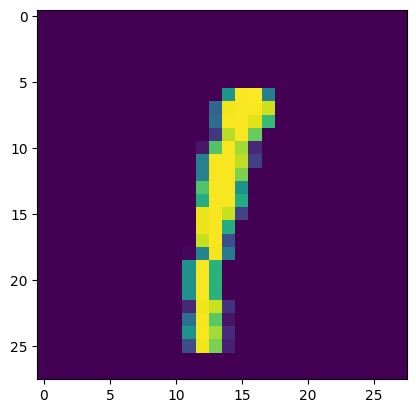

In [35]:
plt.imshow(df.iloc[21947,1:].values.reshape(28,28))

In [36]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [37]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
x_train.shape

(33600, 784)

In [41]:
x_test.shape

(8400, 784)

In [42]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
start_time=time.time()
y_pred=knn.predict(x_test)
print('time taken to predict:',time.time()-start_time)

time taken to predict: 49.65459895133972


In [44]:
print('accuracy score=',accuracy_score(y_test,y_pred))

accuracy score= 0.9648809523809524


### Implement PCA

In [45]:
# step-1 centralize the data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [46]:
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.transform(x_test)

In [47]:
from sklearn.decomposition import PCA

pca=PCA(n_components=None)

In [48]:
x_train_pca=pca.fit_transform(x_train_scale)
x_test_pca=pca.transform(x_test_scale)

In [49]:
x_train_pca.shape

(33600, 784)

In [50]:
pca=PCA(n_components=100)
x_train_pca=pca.fit_transform(x_train_scale)
x_test_pca=pca.transform(x_test_scale)
x_train_pca.shape

(33600, 100)

In [51]:
x_test_pca.shape

(8400, 100)

In [52]:
knn=KNeighborsClassifier()

In [53]:
knn.fit(x_train_pca,y_train)

KNeighborsClassifier()

In [54]:
start_time=time.time()
y_pred=knn.predict(x_test_pca)
print("time taken:",time.time()-start_time)

time taken: 15.34286379814148


In [55]:
accuracy_score(y_test,y_pred)

0.9544047619047619

In [ ]:
for i in range(1,785):
    print(i)
    pca=PCA(n_components=i)
    x_train_pca=pca.fit_transform(x_train_scale)
    x_test_pca=pca.transform(x_test_scale)
    knn=KNeighborsClassifier()
    knn.fit(x_train_pca,y_train)
    y_pred=knn.predict(x_test_pca)
    print(f'Accuracy score for {i} PC=',accuracy_score(y_test,y_pred))
    

In [59]:
pca2d=PCA(n_components=2)
x_train_pca2=pca2d.fit_transform(x_train_scale)


In [60]:
x_train_pca2

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

In [63]:
import plotly.express as px

y_train_trf=y_train.astype('str')

px.scatter(x=x_train_pca2[:,0],
               y=x_train_pca2[:,1],
               color=y_train_trf,
               color_discrete_sequence=px.colors.qualitative.G10)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'color=6<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '6',
              'marker': {'color': '#3366CC', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '6',
              'showlegend': True,
              'type': 'scattergl',
              'x': {'bdata': ('7+YRacK/BcBAPsAZ8aUhQIoNabRx2y' ... 'SZItQXQOLEaKEeNxpAQTlGu//z8D8='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('8GbMKEdZ37+EEwQZ9Anjv250uP0/ih' ... 'MaSNkQQMpaR2M/kCbADIMXklZT7j8='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'color=5<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '5',
              'marker': {'color': '#DC3912', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '5',
              'showlegend': True,
              'type': 'scattergl',
              'x': {'bdata': ('s4qxRtKp5b8dNHq9BvIDwCjBrOdFOg' ... 'KcwImBv7/gD8oOFUMSwK6yGv7J/QHA'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('0m16P7YDG8DDDir/mZ4FwMlJ54huEB' ... 'K3DFZCE8C07y+A6A0QwBBP5xQNOOc/'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'color=3<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '3',
              'marker': {'color': '#FF9900', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '3',
              'showlegend': True,
              'type': 'scattergl',
              'x': {'bdata': ('FtGokA9ECMDttKGwTtUIwJle2z68yt' ... 'ExKdwlEUBkUtyoJGkSQOT94URxXOs/'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('/2PNRA0KGkAlCInbCjAIwHIH2hHpui' ... 'd2VmZlKUBFWzbVsjskwDddgLhslyLA'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'color=4<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '4',
              'marker': {'color': '#109618', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '4',
              'showlegend': True,
              'type': 'scattergl',
              'x': {'bdata': ('drOzr7ULyr+t2wBR5ewRQBbbH6C2EQ' ... 'dsDOk/7VeP3Wjs+r+nwKpaJo4UQA=='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('89naElSoFUBopSeg23McQBtvl+jZty' ... 'WRSh9Av+OCgWJsBsCoJXDLB7cZQA=='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'color=7<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '7',
              'marker': {'color': '#990099', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '7',
              'showlegend': True,
              'type': 'scattergl',
              'x': {'bdata': ('Q6vwmkhMHsDRePEwRyv2P+jtEuPh4x' ... 'oBSksawEvt6K3isgLAAq9Gz34+HsA='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('dnQLtApwFkDM3O/nb/MrQHcZO9pcdh' ... 'CbcTMMQI9gyrKsDwzAtufYpGl58T8='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'color=8<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '8',
              'marker': {'color': '#0099C6', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '8',
              'showlegend': True,
              'type': 'scattergl',
              'x': {'bdata': ('Y7/kv8J9EkDVnSer0K4UwHZxNDdLNh' ... 'z8jxnoBMBPrViWqxwNwA5ysjVshATA'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('e3qMJihWFkAFjO1Krz4HwLMRsqJzeA' ... 'Ymwao8H8DqCOgRk0AJwI92WWpfcxnA'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'color=0<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#DD4477', '

In [64]:
pca3d=PCA(n_components=3)
x_train_pca3=pca3d.fit_transform(x_train_scale)
x_train_pca3

array([[-2.71863253, -0.48982409,  1.1354966 ],
       [-0.67698015, -6.75362491, -2.33590139],
       [-3.03323281,  6.50981624,  7.49182983],
       ...,
       [ 2.14883643,  0.78079444, -0.74738774],
       [ 1.05957006,  0.94767312,  3.94973114],
       [17.70258446,  1.96188185, -4.94352837]])

In [65]:
y_train_trf=y_train.astype('str')

px.scatter_3d(x=x_train_pca3[:,0],
               y=x_train_pca3[:,1],
               z=x_train_pca3[:,2],
               color=y_train_trf,
               color_discrete_sequence=px.colors.qualitative.G10)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'color=6<br>x=%{x}<br>y=%{y}<br>z=%{z}<extra></extra>',
              'legendgroup': '6',
              'marker': {'color': '#3366CC', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '6',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': {'bdata': ('7+YRacK/BcBAPsAZ8aUhQIoNabRx2y' ... 'SZItQXQOLEaKEeNxpAQTlGu//z8D8='),
                    'dtype': 'f8'},
              'y': {'bdata': ('8GbMKEdZ37+EEwQZ9Anjv250uP0/ih' ... 'MaSNkQQMpaR2M/kCbADIMXklZT7j8='),
                    'dtype': 'f8'},
              'z': {'bdata': ('bouJe/4q8j9/JFMEuF7Vv2m84pBE4Q' ... 'S6564HQCEepP6Ym9Y/HHc4pAyZD0A='),
                    'dtype': 'f8'}},
             {'hovertemplate': 'color=5<br>x=%{x}<br>y=%{y}<br>z=%{z}<extra></extra>',
              'legendgroup': '5',
              'marker': {'color': '#DC3912', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '5',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': {'bdata': ('s4qxRtKp5b8dNHq9BvIDwCjBrOdFOg' ... 'KcwImBv7/gD8oOFUMSwK6yGv7J/QHA'),
                    'dtype': 'f8'},
              'y': {'bdata': ('0m16P7YDG8DDDir/mZ4FwMlJ54huEB' ... 'K3DFZCE8C07y+A6A0QwBBP5xQNOOc/'),
                    'dtype': 'f8'},
              'z': {'bdata': ('iSaAEe2vAsDwP+p2Zw8BwNHGq5xjXA' ... '5tq2WvBMB9rRLoPBzJP6Mg+UPEkQJA'),
                    'dtype': 'f8'}},
             {'hovertemplate': 'color=3<br>x=%{x}<br>y=%{y}<br>z=%{z}<extra></extra>',
              'legendgroup': '3',
              'marker': {'color': '#FF9900', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '3',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': {'bdata': ('FtGokA9ECMDttKGwTtUIwJle2z68yt' ... 'ExKdwlEUBkUtyoJGkSQOT94URxXOs/'),
                    'dtype': 'f8'},
              'y': {'bdata': ('/2PNRA0KGkAlCInbCjAIwHIH2hHpui' ... 'd2VmZlKUBFWzbVsjskwDddgLhslyLA'),
                    'dtype': 'f8'},
              'z': {'bdata': ('LtFYPaL3HUDPiLccFzrJv3cFjIPjSd' ... 'SgzHuYIEAv/duDXoILQDHcvPhVEQXA'),
                    'dtype': 'f8'}},
             {'hovertemplate': 'color=4<br>x=%{x}<br>y=%{y}<br>z=%{z}<extra></extra>',
              'legendgroup': '4',
              'marker': {'color': '#109618', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '4',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': {'bdata': ('drOzr7ULyr+t2wBR5ewRQBbbH6C2EQ' ... 'dsDOk/7VeP3Wjs+r+nwKpaJo4UQA=='),
                    'dtype': 'f8'},
              'y': {'bdata': ('89naElSoFUBopSeg23McQBtvl+jZty' ... 'WRSh9Av+OCgWJsBsCoJXDLB7cZQA=='),
                    'dtype': 'f8'},
              'z': {'bdata': ('0iCbm9dHH8BESVyNm8IRwAjoKso1kx' ... 'VzrQHAWa3OpkxdC8CMNb2S8sPsPw=='),
                    'dtype': 'f8'}},
             {'hovertemplate': 'color=7<br>x=%{x}<br>y=%{y}<br>z=%{z}<extra></extra>',
              'legendgroup': '7',
              'marker': {'color': '#990099', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '7',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': {'bdata': ('Q6vwmkhMHsDRePEwRyv2P+jtEuPh4x' ... 'oBSksawEvt6K3isgLAAq9Gz34+HsA='),
                    'dtype': 'f8'},
              'y': {'bdata': ('dnQLtApwFkDM3O/nb/MrQHcZO9pcdh' ... 'CbcTMMQI9gyrKsDwzAtufYpGl58T8='),
                    'dtype': 'f8'},
              'z': {'bdata': ('2EPwTwd4GcDtm9/H0l8SwHsVkpw9wP' ... 'v20OQSwAkG4grUzRXAOe8LzBa0D8A='),
                    'dtype': 'f8'}},
             {'hovertemplate': 'color=8<br>x=%{x}<br>y=%{y}<br>z=%{z}<extra></extra>',
              'legendgroup': '8',
              'marker': {'color': '#0099C6', 'symbol': 

In [ ]:
pca3d.explained_variance_  # eigen values

array([40.67111198, 29.17023401, 26.74459621])

In [67]:
pca3d.components_  # eigen vectors

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [68]:
pca3d.components_.shape

(3, 784)

In [69]:
len(pca3d.components_[0])

784

In [70]:
pca3d.components_[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.38369262e-04,  1.73982207e-05,  2.11624096e-04,  2.11624096e-04,
       -1.11022302e-16,  0.00000000e+00, -8.32667268e-17,  0.00000000e+00,
       -3.46944695e-18,  8.67361738e-19,  2.16840434e-19,  2.71050543e-20,
        0.00000000e+00,  4.23516474e-22, -1.05879118e-22,  0.00000000e+00,
       -8.27180613e-25,  1.03397577e-25,  0.00000000e+00,  0.00000000e+00,
        1.00974196e-28,  1.17608985e-03,  1.83739155e-03,  2.14915529e-03,
        2.31042565e-03,  3.24604309e-03,  4.02749142e-03,  3.70213851e-03,
        2.42776645e-03,  2.02336678e-03,  2.55656571e-03,  2.08713994e-03,
        1.44426283e-03,  2.61849164e-04,  1.23791259e-04,  8.45358682e-05,
       -5.77697608e-05, -2.61983149e-04, -6.63461044e-05, -6.63461044e-05,
        0.00000000e+00,  

### Find out Optimum number of PC

In [71]:
pca=PCA(n_components=None)
x_train_pca=pca.fit_transform(x_train_scale)

In [73]:
pca.components_.shape

(784, 784)

In [75]:
pca.explained_variance_.shape

(784,)

In [76]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [77]:
np.cumulative_sum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

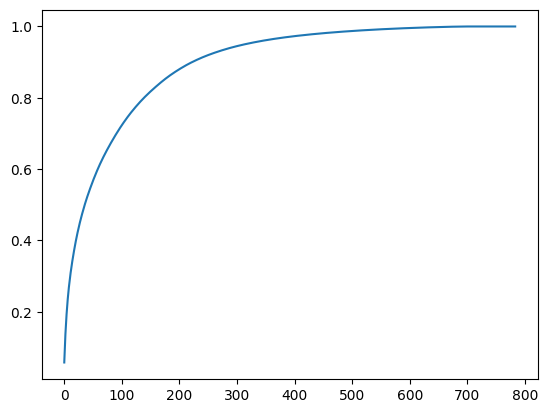

In [78]:
plt.plot(np.cumulative_sum(pca.explained_variance_ratio_))

In [79]:
pca=PCA(n_components=400)
x_train_pca=pca.fit_transform(x_train_scale)
x_test_pca=pca.transform(x_test_scale)
knn=KNeighborsClassifier()
knn.fit(x_train_pca,y_train)
y_pred=knn.predict(x_test_pca)
accuracy_score(y_test,y_pred)

0.9436904761904762